<a href="https://colab.research.google.com/github/profdeborapaulo/data-science-introducao/blob/main/analise_alugueis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualização de Dados



## Relações pareadas usando grids com Seaborn






*  A ciência de dados está presente na realidade de muitas empresas e tem se mostrado uma importante ferramenta para o entendimento da realidade e a tomada de decisão. Ela se tornou popular devido ao aumento na quantidade de dados produzidos e armazenados por empresas que operam nos mais diversos mercados.
Imagine que você é o analista de dados responsável por analisar o mercado imobiliário brasileiro por meio da análise gráfica de dados do assunto.
Para isso, você deverá utilizar a base de dados de aluguéis disponibilizada em anexo. Nessa tarefa, deverá produzir o código fonte necessário para gerar as visualizações solicitadas e analisar cada gráfico respondendo ao que foi solicitado.
Lembre-se de analisar o banco de dados antes de iniciar este Desafio. Pode ser útil construir o dicionário de dados para compreender melhor os dados disponíveis.






1. Construa um gráfico de relações pareadas que cruze as informações de número de quartos, número de banheiros, vagas de garagens e o total do aluguel. Pinte os dados pela cidade do imóvel. Responda: qual a cidade tem o aluguel mais caro para um imóvel de um quarto?

2. Construa um gráfico facetado por cidade mapeando o número de quartos que cada cidade tem. Use como visualização dos sugráficos a classe sns.countplot. Em seguida, identifique a quantidade de quartos mais frequente nos apartamentos disponíveis em cada uma das cidades.

3. Construa um gráfico facetado pelas cidades (colunas) e pela variável animal (linhas) com a distribuição do valor total do aluguel. Há alguma cidade onde o fato de o condomínio aceitar animais afeta o preço do aluguel?





In [8]:
#Importando as bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv('/content/drive/MyDrive/data-science/alugueis.csv')

In [10]:
df.head()

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


1. Resposta após análise:
<p> A cidade que tem o aluguel mais caro para um imóvel de um quarto é São Paulo. </p>

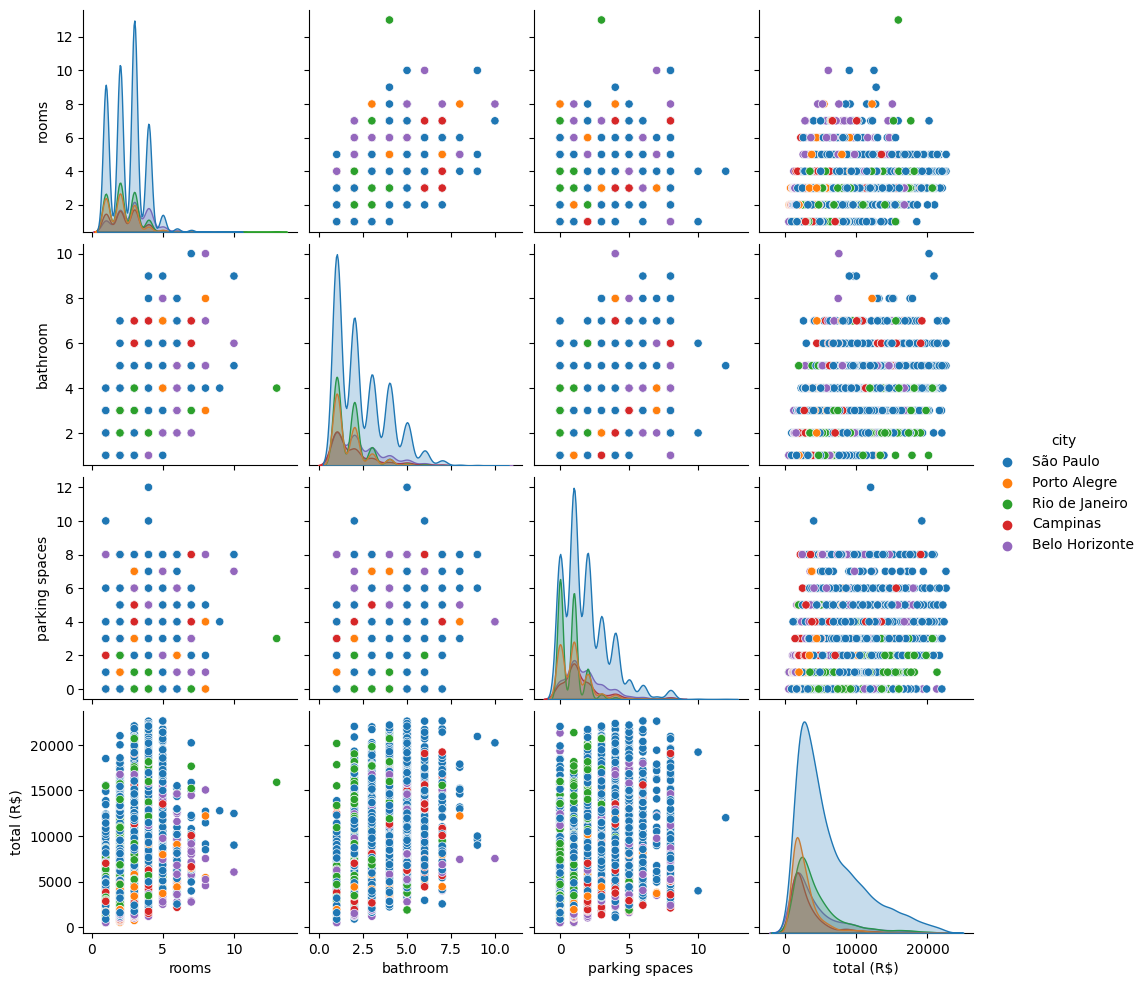

In [35]:
sns_plot = sns.pairplot(df[['city', 'rooms', 'bathroom', 'parking spaces', 'floor', 'animal', 'furniture', 'total (R$)']], hue="city")
#df = sns.pairplot(df[['city', 'rooms', 'bathroom', 'parking spaces', 'floor', 'animal', 'furniture', 'total (R$)']], hue="city")


2.   Resposta após análise:
<p> Em São Paulo, Campinas e Belo Horizonte, o valor mais frequente é três quartos. Em Porto Alegre e no Rio de Janeiro, é dois quartos. </p>



/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


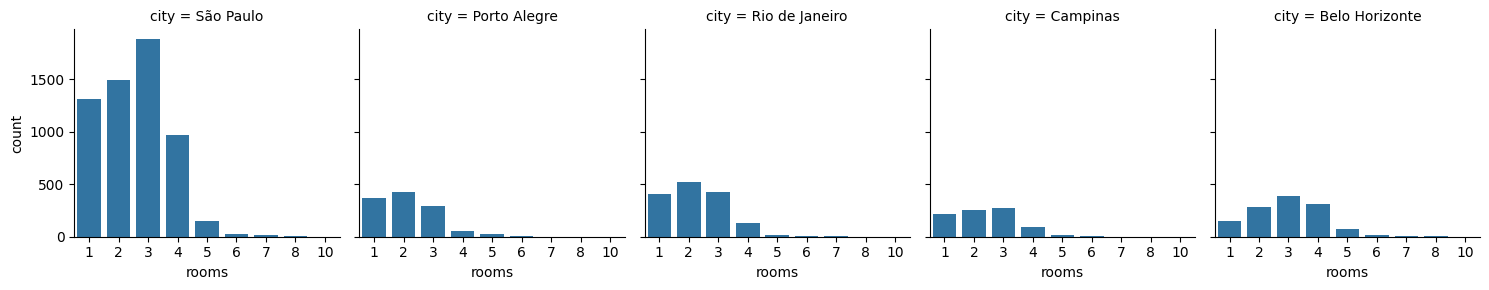

In [37]:
grid = sns.FacetGrid(df, col='city')
grid.map(sns.countplot, 'rooms')



3. Resposta após a análise:
<p> Em nenhuma das cidades há diferença grande nas curvas de distribuição e nos histogramas para essa variável. Portanto, a variável animal não tem influência. </p>



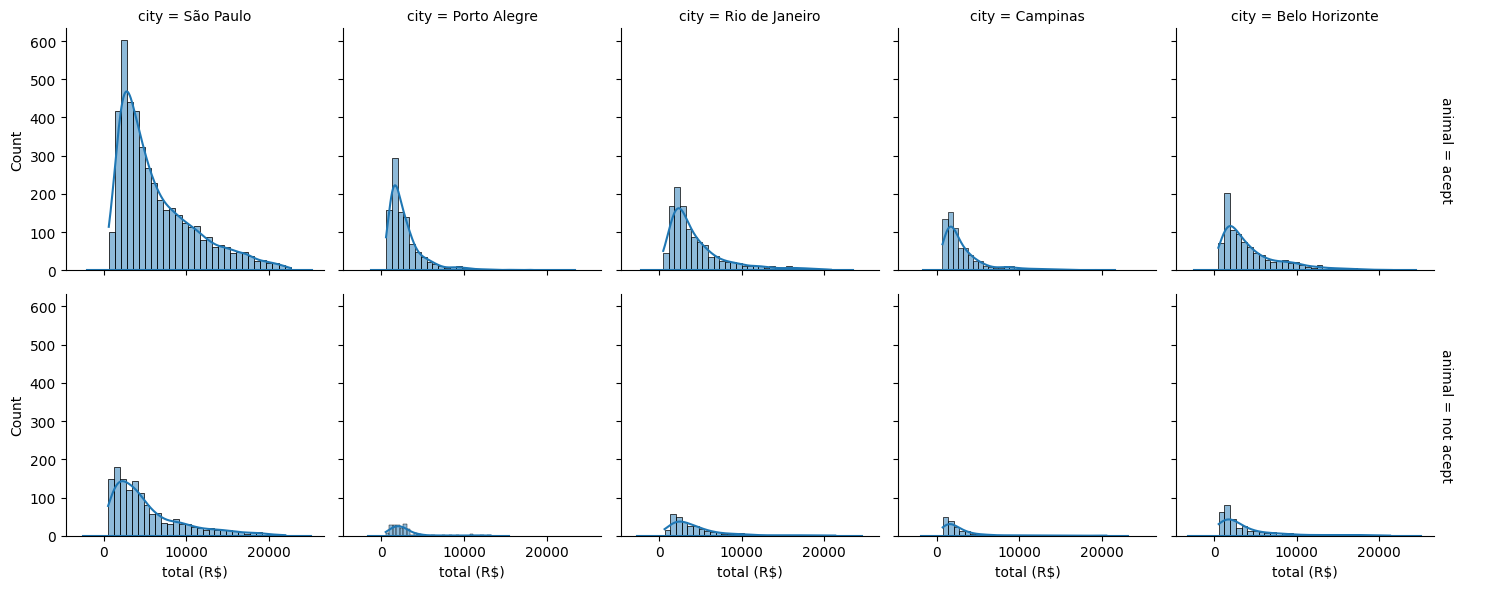

In [41]:
# Create a FacetGrid with rows based on "animal" and columns based on "city"
facet = sns.FacetGrid(df, col="city", row="animal", margin_titles=True)

# Map histplot and kdeplot to the FacetGrid
facet.map(sns.histplot, "total (R$)", bins=30, kde=True)
facet.map(sns.kdeplot, "total (R$)")

# Add a legend
facet.add_legend()

# Show the plot
plt.show()

In [ ]:
'''
Create a FacetGrid with rows based on "animal" and columns based on "city"
facet = sns.FacetGrid(df, col="city", row="animal", margin_titles=True)

facet.map(sns.histplot, "total (R$)", kde=True, bins=30)
facet.map(sns.kdeplot, "total (R$)").add_legend()
'''